# Real Data

In [ ]:
import sys
import os
import pickle
from tqdm import tqdm
from topolearn import *
import warnings
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np
warnings.filterwarnings("ignore")

J=2
P=3

seed = 0
mat = scipy.io.loadmat('C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\real_data\\data_real.mat')
edge_signals = np.array(mat["signal_edge"].T, dtype=float)
valid_signal = np.where(np.sum(edge_signals, axis=1)!=0)
edge_signals = edge_signals[valid_signal]
Y_train, Y_test = train_test_split(edge_signals, test_size=0.2, random_state=seed)
Y_train = Y_train.T
Y_test = Y_test.T
Lu = mat["B2"] @ mat["B2"].T
Ld = mat["B1"].T @ mat["B1"]
L=Lu+Ld
Lu = np.array(Lu, dtype=float)
Ld = np.array(Ld, dtype=float)
L = np.array(L, dtype=float)


with open("C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\synthetic_data\\random_sparsity25\\full_data_separated.pkl", "rb") as file:
    data = pickle.load(file)
c = data["c_true"].max()
epsilon = data["epsilon_true"].mean()

K0_coll = np.arange(5, 26, 4)

init_params = {
    "J": J,
    "P": P,
    "true_prob_T": 1.,
    "n": mat["B1"].shape[0],
    "sparsity": 25,
    "model.B1": mat["B1"],
    "B2_true": mat["B2"]
}

algo_params = {
    "lambda_": 1e-2,
    "lambda2": 0.3,
    "mu": 10,
    "tol": 1e-7,
    "patience": 20,
    "max_iter": 800,
    "QP": True,
    "mode": "optimistic",
    "warmup": 2,
    "on_test": False,
    "complete": True,
    "verbose": True,
}

min_error_cfou_train = np.zeros((len(K0_coll)))
min_error_cfou_test = np.zeros((len(K0_coll)))
min_error_fou_train = np.zeros((len(K0_coll)))
min_error_fou_test = np.zeros((len(K0_coll)))
min_error_slep_train = np.zeros((len(K0_coll)))
min_error_slep_test = np.zeros((len(K0_coll)))
min_error_wave_train = np.zeros((len(K0_coll)))
min_error_wave_test = np.zeros((len(K0_coll)))
min_error_sep_train = np.zeros((len(K0_coll)))
min_error_sep_test = np.zeros((len(K0_coll)))
min_error_complete_train = np.zeros((len(K0_coll)))
min_error_complete_test = np.zeros((len(K0_coll)))
min_error_pess_train = np.zeros((len(K0_coll)))
min_error_pess_test = np.zeros((len(K0_coll)))
approx_cfou = np.zeros((len(K0_coll)))
approx_fou = np.zeros((len(K0_coll)))
approx_sep = np.zeros((len(K0_coll)))
approx_slep = np.zeros((len(K0_coll)))
approx_wave = np.zeros((len(K0_coll)))
approx_comp = np.zeros((len(K0_coll)))
approx_pess = np.zeros((len(K0_coll)))

dict_errors = {
    "classic_fourier": (min_error_cfou_train, min_error_cfou_test, approx_cfou),
    "fourier": (min_error_fou_train, min_error_fou_test, approx_fou),
    "slepians": (min_error_slep_train, min_error_slep_test, approx_slep),
    "wavelet": (min_error_wave_train, min_error_wave_test, approx_wave),
    "separated": (min_error_sep_train, min_error_sep_test, approx_sep),
    "complete": (min_error_complete_train, min_error_complete_test, approx_comp),
    "complete_soft": (min_error_pess_train, min_error_pess_test, approx_pess)
}

dict_errors2 = {
    "classic_fourier": min_error_cfou_test,
    "fourier": min_error_fou_test,
    "slepians": min_error_slep_test,
    "wavelet": min_error_wave_test,
    "separated": min_error_sep_test,
    "complete": min_error_complete_test,
    "complete_soft": min_error_pess_test,
}

dict_types = {
    # "classic_fourier": ("Fourier", "classic_fourier"),
    # "fourier": ("Topological Fourier", "fourier"),
    # "slepians": ("Topological Slepians", "slepians"),
    # "wavelet": ("Hodgelet", "wavelet"),
    # "separated": ("Separated Hodge Laplacian", "separated"),
    # "complete": ("Separated Hodge Laplacian with Topology learning","separated"),
    "complete_soft": ("Separated Hodge Laplacian with Soft Topology learning","separated"),
}

models = {}

for k0_index, k0 in tqdm(enumerate(K0_coll), leave=False):

    for d in dict_types.items():

        model = TopoSolver(
            X_train=None,
            X_test=None,
            Y_train=Y_train,
            Y_test=Y_test,
            c=c,
            epsilon=epsilon,
            K0=k0,
            dictionary_type=d[1][1],
            **init_params,
        )

        learn_topology = True if "complete" in d[0] else False
        if "pess" in d[0]:
            algo_params["mode"]="pessimistic"
        else:
            algo_params["mode"]="optimistic"

        (
            dict_errors[d[0]][0][k0_index],
            dict_errors[d[0]][1][k0_index],
            dict_errors[d[0]][2][k0_index],
        ) = model.fit(
            Lu_true=Lu,
            init_mode="only_X",
            learn_topology=learn_topology,
            **algo_params,
        )
        dict_errors2[d[0]] = dict_errors[d[0]][1]
        models[f"{k0_index},{d[0]}"] = model

        print(
            f"Sparsity: {k0} Testing {d[1][0]}... Done! Test Error: {dict_errors[d[0]][1][k0_index]:.6f}"
        )

0it [00:00, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.793609156546975 False 0.06120932972453626
[0.99999996 1.         0.99999991 1.         1.         0.99999995
 1.         0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999993
 0.99999998 1.         1.         1.         1.         1.
 1.         1.         0.99999999 1.         1.         1.
 1.         1.         0.99999998]
2 11.834599844344044 True 0.10138722770016916
[1.         1.         0.99249608 1.         1.         0.99699093
 1.         0.99557525 0.99980688 1.         1.         0.99973721
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99939565 0.99806318
 0.9957872  1.         1.         0.9943631  1.         0.99958663
 1.         1.         0.99963296 1.         1.        

1it [00:27, 27.11s/it]

Sparsity: 5 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.069269
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.959460212148942 False 0.22651472854070298
[0.92046199 0.98921177 1.         1.         0.6828254  0.99219094
 1.         1.         0.99909618 1.         1.         1.
 1.         1.         1.         0.84094689 1.         0.99502458
 1.         1.         0.99232281 0.99853681 0.81616588 1.
 0.99777643 0.9938176  1.         1.         1.         0.98588365
 1.         0.69397978 0.97987286 0.97060954 0.79550248 0.99988753
 1.         0.999151   0.99964016]
2 11.505994974636675 True 0.17335034252396353
[1.         0.97258285 1.         0.9664589  0.73220511 0.97916841
 1.         1.         0.99721352 1.         1.         0.99094825
 1.         1.         1.         0.77330836 1.         0.9962507
 1.         0.95016797 0.98616396 0.99805149 0.80385737 1.
 0.

2it [00:35, 15.94s/it]

Sparsity: 9 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.009858
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.75298708779357 False 0.020526912938844347
[0.94537381 0.99998707 0.95758322 0.9078287  0.95213489 1.
 1.         0.98542044 0.99897665 0.99945717 1.         0.99953681
 1.         1.         1.         0.99748355 0.99635064 0.9983557
 0.99979737 0.99203882 0.99642801 0.99967606 0.99080254 0.98736017
 0.99999566 0.99718326 0.99994393 0.96264756 0.99988019 0.99859245
 0.99080621 0.96437954 0.99430963 0.99378296 0.9957781  0.9972698
 1.         0.99922794 0.98548114]
2 11.620104699698752 True 0.011267032561314054
[0.94568491 0.99998707 0.94392512 0.89294603 0.95034407 0.99834037
 1.         0.98092352 0.99864176 0.99923316 1.         0.99890906
 1.         1.         0.99999665 0.99616962 0.99534417 0.9985442
 0.99975793 0.98535905 0.99544042 0.99960513 0.98887494

3it [02:01, 48.01s/it]

Sparsity: 13 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.002755
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.740998823354367 False 0.00859329331877389
[0.99705494 0.99996183 0.97892566 0.97389685 0.98614578 1.
 1.         0.99049189 0.9989772  0.99957225 1.         0.99944227
 0.9999804  0.99999647 0.99999367 0.99531992 0.9971324  1.
 0.99970301 0.98795559 0.99986485 0.9999088  0.99889546 0.98042171
 1.         0.99967728 0.99993228 0.97418492 0.99966461 0.99876975
 0.99384741 0.98519677 0.99836184 0.98649806 0.97183477 0.9983622
 0.99796857 0.99877987 0.99214396]
2 11.672280893337767 True 0.005842531010054567
[0.99618743 1.         0.97583747 0.95413691 0.9713671  1.
 1.         0.98616166 0.99804665 0.9991763  1.         0.99934424
 0.99997108 0.99999647 1.         0.9942578  0.99622384 1.
 0.99963033 0.97882766 0.9979083  0.99997347 0.99852647 0.97099979
 1.      

4it [02:38, 43.75s/it]

Sparsity: 17 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.001158
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.742054469853493 False 0.0023624752144764333
[0.99767234 0.99955788 0.99552971 0.99884284 0.99848221 1.
 1.         0.99953199 0.99985445 0.99974835 0.99998984 0.99998476
 0.99999265 1.         0.99996391 0.9987392  0.99775248 0.99861835
 0.99980837 0.99782062 0.99949715 0.99989864 0.99936647 0.99858807
 0.9983613  0.99989019 0.9999476  0.99818134 0.99995459 0.99966533
 0.9955881  1.         0.99980655 0.99901161 0.99847901 0.99955396
 0.99741435 0.99965985 0.99430014]
2 11.729985367830606 True 0.002576457561152245
[0.99503622 0.9993098  0.99082475 0.99395977 0.99657199 1.
 1.         0.99960557 0.99976744 0.99957548 0.99999495 0.99990423
 0.99998839 0.99998741 0.99993669 0.99751293 0.99560428 0.99741182
 0.99965097 0.99655866 0.99983301 0.99971521 0.99838572 0

5it [03:24, 44.44s/it]

Sparsity: 21 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.000761
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 11.758384222278147 False 0.015817543480989592
[0.94086428 1.         1.         0.98315738 0.99832715 1.
 0.99999427 0.99704334 0.99630673 1.         1.         0.99897136
 0.99975896 1.         1.         0.98260352 1.         0.99802463
 0.99968285 1.         0.99970543 0.99903237 0.99898496 0.99254647
 0.99907358 0.99764817 0.99939909 0.99436918 0.99998511 0.99928263
 1.         0.98210959 0.99090497 1.         0.98836217 0.9981377
 0.99895636 0.99487336 0.99710214]
2 11.704092631146043 True 0.015169747721975322
[1.         1.         1.         0.96385528 1.         1.
 0.9999956  0.99562631 0.99515407 1.         1.         0.99349272
 0.99923984 1.         1.         0.96996585 1.         0.99747815
 0.99975164 1.         0.99852767 0.99907399 0.9950756  0.9

Sparsity: 25 Testing Separated Hodge Laplacian with Soft Topology learning... Done! Test Error: 0.000537


In [ ]:
# import pickle
# with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "rb") as file:
#     models3 = pickle.load(file)
#     dict_errors3 = pickle.load(file)

# dict_errors3["complete_soft"] = dict_errors2["complete_soft"]
# models3 = [models3, models]

# with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "wb") as file:
#     pickle.dump(models3, file)
#     pickle.dump(dict_errors3, file)

In [1]:
import scipy.io
mat = scipy.io.loadmat('C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\real_data\\data_real.mat')

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def incidence_to_adjacency(b1):
    """
    Convert an incidence matrix (b1) into an adjacency matrix.
    b1 should be a 2D NumPy array of shape (num_edges, num_nodes).
    It is assumed that nonzero entries indicate that a node is incident to an edge.
    """
    # Take the absolute value in case b1 has signed entries
    B = np.abs(b1)
    num_edges, num_nodes = B.shape
    # Initialize an empty adjacency matrix
    A = np.zeros((num_nodes, num_nodes), dtype=int)
    
    # Process each edge
    for edge in B:
        # Find indices of nodes incident to this edge
        nodes = np.where(edge)[0]
        # For a standard graph edge, expect exactly two nodes.
        # For hyperedges (more than 2 nodes), connect all nodes pairwise.
        for i in range(len(nodes)):
            for j in range(i+1, len(nodes)):
                A[nodes[i], nodes[j]] = 1
                A[nodes[j], nodes[i]] = 1  # Ensure symmetry for undirected graph
    return A

In [13]:
np.where(mat["B1"][41,:]==1)[0]

array([77, 81, 85])

In [25]:
np.where(mat["B1"][:,77]!=0)[0]

array([34, 41])

In [26]:
np.where(mat["B1"][:,81]!=0)[0]

array([37, 41])

In [27]:
np.where(mat["B1"][:,85]!=0)[0]

array([40, 41])

In [23]:
np.sum(np.abs(mat["B1"]), axis=0)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [18]:
np.where(mat["B1"][:,77]==1)[0]

array([41])

In [17]:
mat["B1"][41,85]

np.int16(1)

In [8]:
incidence_to_adjacency(mat["B1"])[40,:]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [32]:
import scipy.io
import numpy as np

J=2
P=3
K0_coll = np.arange(5, 26, 4)   
seed = 0
mat = scipy.io.loadmat('C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\real_data\\data_real.mat')
Lu = mat["B2"] @ mat["B2"].T
Ld = mat["B1"].T @ mat["B1"]
L=Lu+Ld
Lu = np.array(Lu, dtype=float)
Ld = np.array(Ld, dtype=float)
L = np.array(L, dtype=float)

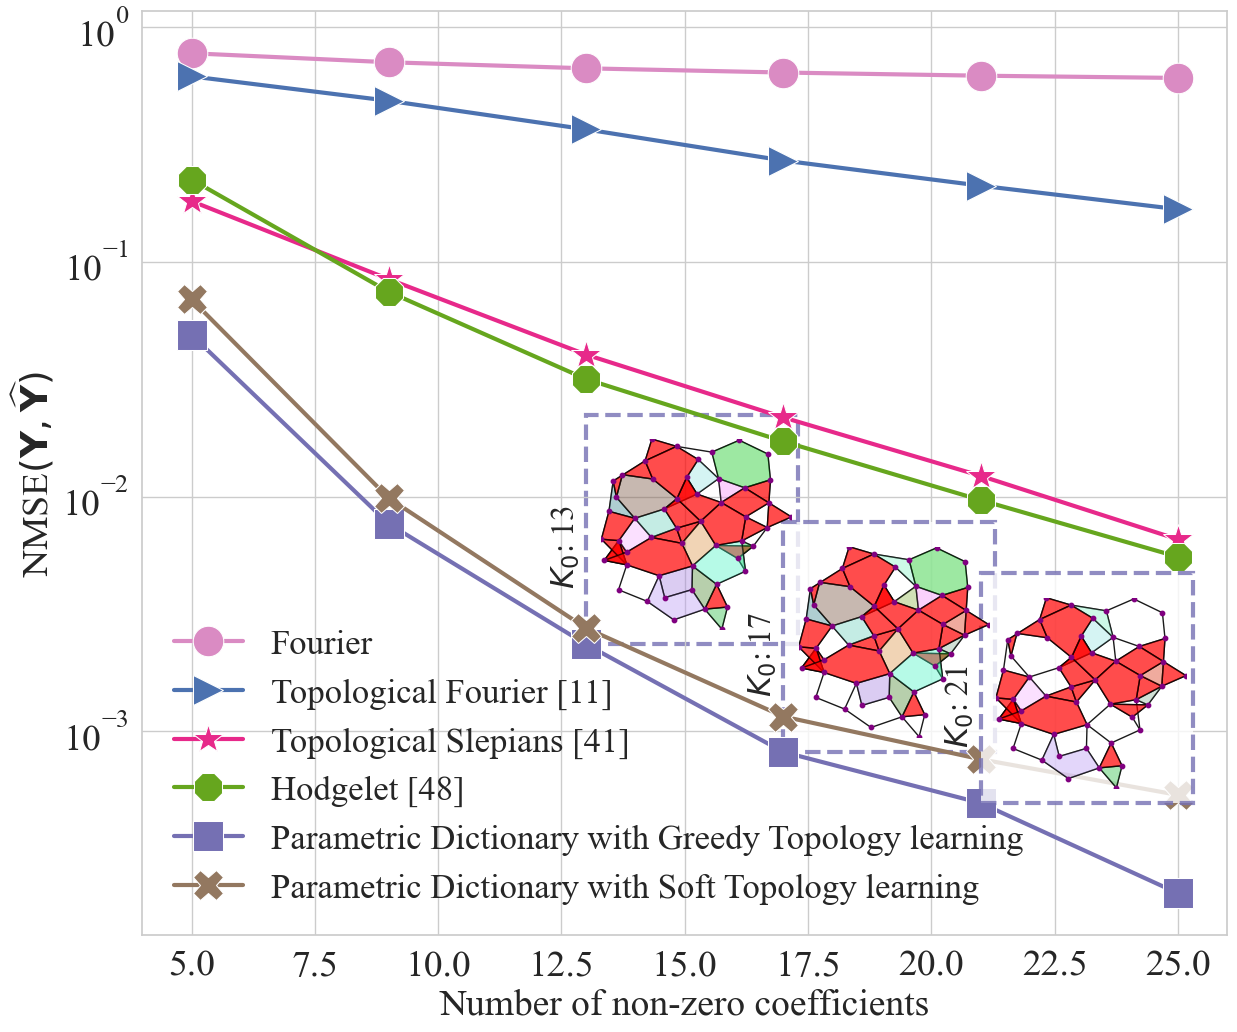

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from networkx.algorithms.cycles import find_cycle
from matplotlib.patches import Polygon
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

import pickle
with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "rb") as file:
    models3 = pickle.load(file)
    dict_errors3 = pickle.load(file)

coll2 = [2,3,4]
models_poly = defaultdict(list)
for idx, i in enumerate(coll2):
    model = models3[0][f'{i},complete']
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))

    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    num_polygons = 0
    B2 = model.B2

    pos = nx.kamada_kawai_layout(G)
    
    for polygon_index in range(B2.shape[1]):
        np.random.seed(polygon_index)
        color = np.random.rand(3)
        polygon_edges = []
        edges = np.where(B2[:, polygon_index] != 0)[0]

        for edge_index in edges:
            nodes = np.array(np.where(model.B1[:, edge_index] != 0)[0], dtype=int)
            polygon_edges.append(tuple(nodes))

        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            # print(idx, cycle_edges)
            polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
            models_poly[idx].append(cycle_edges)
        except Exception:
            pass

def find_common_arrays(data_dict):
    if not data_dict:
        return []
    
    # Convert each list of lists to a set of tuples
    sets_of_arrays = [set(map(tuple, arrays)) for arrays in data_dict.values()]
    
    # Find the intersection of all sets
    common = set.intersection(*sets_of_arrays)
    
    # Convert the tuples back to lists
    return [list(t) for t in common]

common = find_common_arrays(models_poly)
    

fontsize=27
# sns.set(font_scale=1)
dict_types_real = {
    "classic_fourier": "Fourier",
    "fourier": "Topological Fourier [11]",
    "slepians": "Topological Slepians [41]",
    "wavelet": "Hodgelet [48]",
    # "separated": "Parametric Dictionary (Separated Hodge Laplacian)",
    "complete": "Parametric Dictionary with Greedy Topology learning",
    "complete_soft": "Parametric Dictionary with Soft Topology learning",
}

res_df_real = pd.DataFrame()
for typ in dict_types_real.keys():
    if typ == "complete_soft":
        tmp_df = pd.DataFrame(dict_errors3[typ])
    else:
        tmp_df = pd.DataFrame(dict_errors3[typ][0])
    tmp_df = tmp_df.transpose()
    tmp_df.columns = K0_coll
    tmp_df = tmp_df.melt(var_name="Sparsity", value_name="Error")
    tmp_df["Method"] = dict_types_real[typ]
    # print(typ)
    # print(tmp_df)
    res_df_real = pd.concat([res_df_real, tmp_df]).reset_index(drop=True)

# print(res_df_real)

markers = (
 ["o", ">", "*", "8", "s", "X"]
)
colors1 = sns.color_palette()[: len(list(dict_errors3.keys())) - 1]
colors2 = sns.color_palette("Dark2", 5)
colors1[1] = colors2[-2]
colors1[2] = colors2[-1]
colors1 = [colors1[-1]] + colors1[:-1]
colors1[4] = colors2[-3]
colors1[5] = sns.color_palette()[5]

plt.figure(figsize=(14, 12))
sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams["font.size"] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams["font.family"] = "Times New Roman"
my_plt = sns.lineplot(
    data=res_df_real,
    x="Sparsity",
    y="Error",
    hue="Method",
    palette=colors1,
    markers=markers,
    markersize=22,
    dashes=False,
    style="Method",
    linewidth=3,
)
my_plt.set(yscale="log")
my_plt.set_ylabel(r"NMSE$(\mathbf{Y},\widehat{\mathbf{Y}})$", fontsize=fontsize)
my_plt.set_xlabel(f"Number of non-zero coefficients", fontsize=fontsize)
handles, labels = my_plt.get_legend_handles_labels()
my_plt.legend(handles=handles[0:], labels=labels[0:])
plt.legend(
    fontsize=fontsize-2,
    frameon=False,              # Display a frame around the legend
    framealpha=0.3,
    loc="lower left"
)

# --- Adding inset plots for the Greedy (complete) method ---
# We assume that the 3 models in models3 correspond to 3 sparsity levels.
# (Here we assume that each model is associated with one of the first three entries in K0_coll.)
ax = plt.gca()  # get the current axis of the main plot
coll2 = [2,3,4]
for idx, i in enumerate(coll2):
    model = models3[0][f'{i},complete']
    # Choose the x-coordinate (sparsity level) for this model.
    sparsity_val = K0_coll[i]
    # Compute the median error at this sparsity value for the "complete" method.
    main_df = pd.DataFrame(dict_errors3["complete"][0])
    mean_err = main_df.iloc[i]
    
    # Create an inset axis anchored in data coordinates (with the inset’s lower center at (x,y)).
    ax_inset = inset_axes(
        ax, width=1.9, height=1.9, 
        bbox_to_anchor=(sparsity_val, mean_err, 18, 20),
        bbox_transform=ax.transData, 
        loc='lower left', 
        borderpad=0.5,
    )
    
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))

    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    num_polygons = 0
    B2 = model.B2

    pos = nx.kamada_kawai_layout(G)

    # Map the node positions so that the bounding box becomes [-1, 1] in both dimensions.
    xs = np.array([coord[0] for coord in pos.values()])
    ys = np.array([coord[1] for coord in pos.values()])
    xmin, xmax = xs.min(), xs.max()
    ymin, ymax = ys.min(), ys.max()
    # Protect against zero range.
    scale_x = xmax - xmin if xmax - xmin != 0 else 1
    scale_y = ymax - ymin if ymax - ymin != 0 else 1
    for key in pos:
        x, y = pos[key]
        # Normalize to [0,1] then scale to [-1,1].
        pos[key] = ((x - xmin) / scale_x * 2 - 1, (y - ymin) / scale_y * 2 - 1)
    
    ax_inset.set_xlim(-1, 1)
    ax_inset.set_ylim(-1, 1)
    ax_inset.set_aspect('equal', adjustable='box')
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])

    y_lower = float(mean_err)
    y_upper = y_lower * (5**1.4)
    height = y_upper - y_lower
    ax_inset.text((sparsity_val/sparsity_val-1)-1.55, 
                  y_lower-0.5, r"$K_0$" + f": {sparsity_val}", 
                  fontsize=fontsize-4, rotation=90)
    ax.indicate_inset(bounds=[sparsity_val, y_lower, 4.3, height], inset_ax=ax_inset, lw=3, 
                      edgecolor=colors1[4], linestyle='dashed', zorder=idx, alpha=0.8, facecolor="white")
    nx.draw(G, pos, with_labels=False, node_color="purple", node_size=10, ax=ax_inset)
    
    for polygon_index in range(B2.shape[1]):
        np.random.seed(polygon_index)
        color = np.random.rand(3)
        polygon_edges = []
        edges = np.where(B2[:, polygon_index] != 0)[0]

        for edge_index in edges:
            nodes = np.array(np.where(model.B1[:, edge_index] != 0)[0], dtype=int)
            polygon_edges.append(tuple(nodes))

        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
            if cycle_edges in common:
                color="red"
                alpha=0.7
            else:
                alpha=0.4
            p = Polygon(
                polygon_coords,
                facecolor=color,
                fill=True,
                edgecolor="black",
                alpha=alpha,
            )
            ax_inset.add_patch(p)
        except Exception:
            pass


plt.savefig("SignalErrorReal2.pdf", format="pdf", bbox_inches='tight')
plt.show()

## Nodes positions

In [58]:
node_positions = {0: (3, 306), 1: (297, 494), 2: (336, 367), 3: (459, 178), 4: (151, 212), 5: (267, 193), 6: (169, 130), 7: (156, 97), 8: (427, 302), 9: (159, 377), 10: (90, 251), 11: (476, 288), 12: (50, 270), 13: (300, 293), 14: (64, 254), 15: (204, 6), 16: (162, 357), 17: (103, 522), 18: (222, 324), 19: (159, 323), 20: (461, 55), 21: (234, 96), 22: (221, 184), 23: (103, 408), 24: (142, 440), 25: (208, 267), 26: (262, 539), 27: (240, 38), 28: (91, 336), 29: (52, 294), 30: (193, 546), 31: (395, 261), 32: (332, 203), 33: (149, 405), 34: (339, 503), 35: (97, 217), 36: (79, 93), 37: (302, 399), 38: (135, 132), 39: (124, 192), 40: (454, 473), 41: (370, 438), 42: (59, 425), 43: (315, 94), 44: (123, 297), 45: (184, 464), 46: (37, 385), 47: (242, 488), 48: (25, 258), 49: (239, 382)}

In [59]:
node_positions = {i: (x/500, (576 - y)/500) for i, (x, y) in enumerate(list(node_positions.values()))}

## Persistent polygons

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from networkx.algorithms.cycles import find_cycle
from matplotlib.patches import Polygon
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

coll2 = [2,3,4]
models_poly = defaultdict(list)
for idx, i in enumerate(coll2):
    model = models3[0][f'{i},complete']
    A = np.zeros((model.B1.shape[0], model.B1.shape[0]))

    for edge_index in range(model.B1.shape[1]):
        nodes = np.where(model.B1[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    num_polygons = 0
    B2 = model.B2

    pos = nx.kamada_kawai_layout(G)
    
    for polygon_index in range(B2.shape[1]):
        np.random.seed(polygon_index)
        color = np.random.rand(3)
        polygon_edges = []
        edges = np.where(B2[:, polygon_index] != 0)[0]

        for edge_index in edges:
            nodes = np.array(np.where(model.B1[:, edge_index] != 0)[0], dtype=int)
            polygon_edges.append(tuple(nodes))

        subgraph = G.edge_subgraph(polygon_edges)
        try:
            cycle_edges = find_cycle(subgraph)
            # print(idx, cycle_edges)
            polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
            models_poly[idx].append(cycle_edges)
        except Exception:
            pass

def find_common_arrays(data_dict):
    if not data_dict:
        return []
    
    # Convert each list of lists to a set of tuples
    sets_of_arrays = [set(map(tuple, arrays)) for arrays in data_dict.values()]
    
    # Find the intersection of all sets
    common = set.intersection(*sets_of_arrays)
    
    # Convert the tuples back to lists
    return [list(t) for t in common]

common = find_common_arrays(models_poly)

In [104]:
def plot_learnt_topology_real(
    B1_true,
    model1,
    model2,
    model3,
    pos,
    K0_coll,
    common,
    sub_size=np.inf,
    **kwargs,
):

    # # Add edges to the graph based on the incidence matrix
    # for edge_index in range(B1_true.shape[1]):  # iterate over edges (columns)
    #     nodes = np.where(np.abs(B1_true[:, edge_index]) == 1)[
    #         0
    #     ]  # nodes connected by this edge
    #     if len(nodes) == 2:
    #         G.add_edge(nodes[0], nodes[1])
    # # print(G.edges)
    # # Get the adjacency matrix from the graph
    # A = nx.adjacency_matrix(G)
    sns.set(font_scale=2)
    A = np.zeros((B1_true.shape[0], B1_true.shape[0]))

    for edge_index in range(B1_true.shape[1]):
        nodes = np.where(B1_true[:, edge_index] != 0)[0]
        A[nodes[0], nodes[1]] = 1

    G = nx.from_numpy_array(A)

    topos = [model1, model2, model3]
    num_polygons = [
        0,
        0,
        0,
    ]
    incidence_mat = [model1.B2, model2.B2, model3.B2]
    # titles = [
    #     "Assumed number of polygons: ",
    #     "Inferred number of polygons : ",
    #     "Inferred number of polygons: ",
    # ]
    _, axs = plt.subplots(1, 3, figsize=(14, 5))
    plt.rcParams["font.family"] = "Times New Roman"
    i = 0
    for ax in axs:
        # pos = nx.kamada_kawai_layout(G)
        nx.draw(G, pos, with_labels=False, node_color="purple", node_size=45, ax=ax, font_size=20)
        B2 = incidence_mat[i]
        for polygon_index in range(B2.shape[1]):
            np.random.seed(polygon_index)
            color = np.random.rand(3)

            polygon_nodes = np.array([])
            polygon_edges = []
            edges = np.where(B2[:, polygon_index] != 0)[0]

            for edge_index in edges:

                nodes = np.array(np.where(B1_true[:, edge_index] != 0)[0], dtype=int)
                polygon_nodes = np.array(
                    np.concatenate((polygon_nodes, nodes)), dtype=int
                )
                polygon_edges.append(tuple(nodes))

            subgraph = G.edge_subgraph(polygon_edges)
            try:
                cycle_edges = find_cycle(subgraph)
                polygon_coords = [pos[edge[0]] for edge in cycle_edges] + [pos[cycle_edges[0][0]]]
                if cycle_edges in common:
                    color="red"
                    alpha=0.7
                else:
                    alpha=0.4
                num_polygons[i] += 1
                p = Polygon(
                    polygon_coords,
                    facecolor=color,
                    fill=True,
                    edgecolor="black",
                    alpha=alpha,
                )
                ax.add_patch(p)
            except Exception:
                pass

        ax.set_title(r"$K_0$: " + f"{K0_coll[i]}" + f"\n NMSE: {topos[i].get_test_error(4)}")
        ax.text(
            0.5,
            -0,
            f"Inferred Polygons: {num_polygons[i]}",
            ha="center",
            transform=ax.transAxes,
        )

        i += 1
    plt.savefig("RealTopos.pdf", format="pdf", bbox_inches='tight')
    plt.tight_layout()

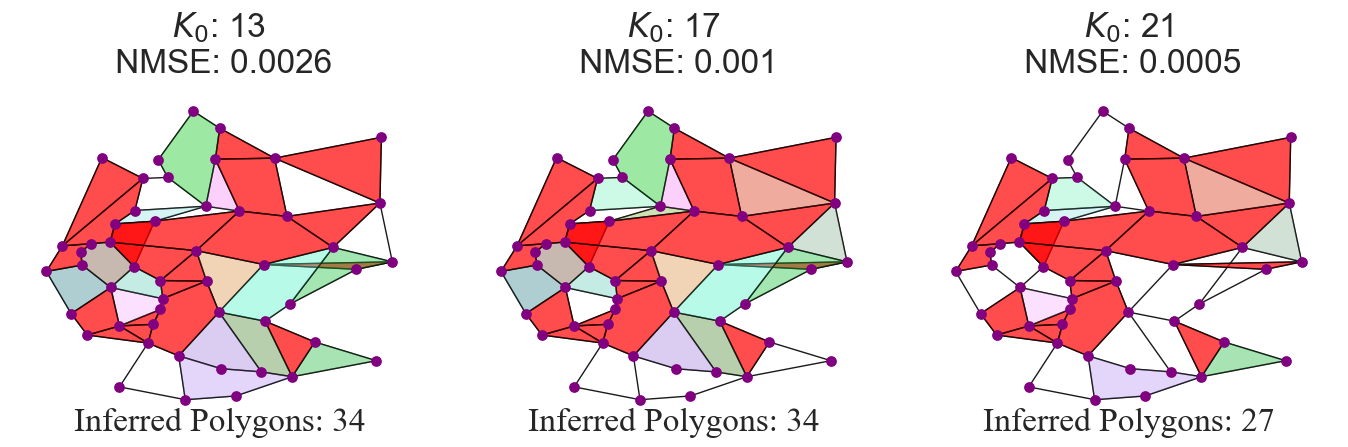

In [105]:
import pickle
with open(f"C:\\Users\\engri\\Desktop\\tesi\\TSP-DictionaryLearning\\results\\real\\real_J{J}P{P}.pkl", "rb") as file:
    models3 = pickle.load(file)
    dict_errors3 = pickle.load(file)

coll2 = [2,3,4]
model1 = models3[0]['2,complete']
model2 = models3[0]['3,complete']
model3 = models3[0]['4,complete']

plot_learnt_topology_real(mat["B1"], model1, model2, model3, node_positions, K0_coll[coll2], common)

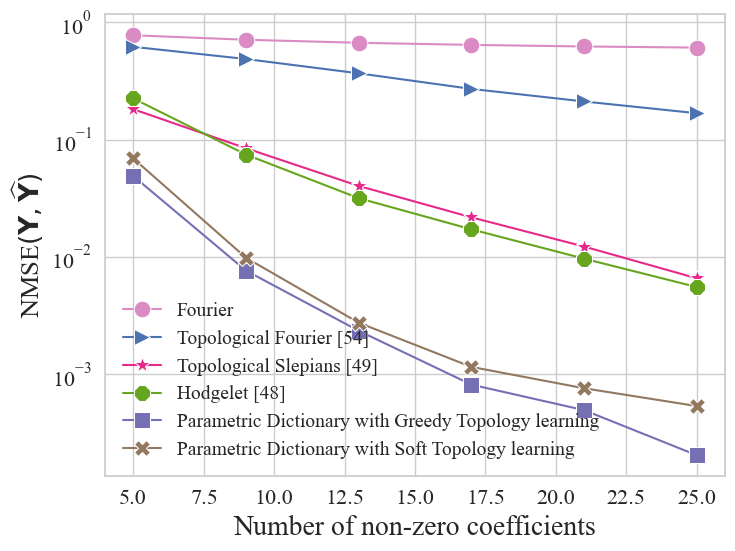

In [106]:
# sns.set(font_scale=1)
dict_types_real = {
    "classic_fourier": "Fourier",
    "fourier": "Topological Fourier [54]",
    "slepians": "Topological Slepians [49]",
    "wavelet": "Hodgelet [48]",
    # "separated": "Parametric Dictionary (Separated Hodge Laplacian)",
    "complete": "Parametric Dictionary with Greedy Topology learning",
    "complete_soft": "Parametric Dictionary with Soft Topology learning",
}

res_df_real = pd.DataFrame()
for typ in dict_types_real.keys():
    if typ == "complete_soft":
        tmp_df = pd.DataFrame(dict_errors3[typ])
    else:
        tmp_df = pd.DataFrame(dict_errors3[typ][0])
    tmp_df = tmp_df.transpose()
    tmp_df.columns = K0_coll
    tmp_df = tmp_df.melt(var_name="Sparsity", value_name="Error")
    tmp_df["Method"] = dict_types_real[typ]
    # print(typ)
    # print(tmp_df)
    res_df_real = pd.concat([res_df_real, tmp_df]).reset_index(drop=True)

# print(res_df_real)

markers = (
 ["o", ">", "*", "8", "s", "X"]
)
colors1 = sns.color_palette()[: len(list(dict_errors3.keys())) - 1]
colors2 = sns.color_palette("Dark2", 5)
colors1[1] = colors2[-2]
colors1[2] = colors2[-1]
colors1 = [colors1[-1]] + colors1[:-1]
colors1[4] = colors2[-3]
colors1[5] = sns.color_palette()[5]

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = 16 
plt.rcParams['ytick.labelsize'] = 16  
plt.rcParams["font.size"] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams["font.family"] = "Times New Roman"
my_plt = sns.lineplot(
    data=res_df_real,
    x="Sparsity",
    y="Error",
    hue="Method",
    palette=colors1,
    markers=markers,
    markersize=12,
    dashes=False,
    style="Method",
)
my_plt.set(yscale="log")
my_plt.set_ylabel(r"NMSE$(\mathbf{Y},\widehat{\mathbf{Y}})$", fontsize=19)
my_plt.set_xlabel(f"Number of non-zero coefficients", fontsize=20)
handles, labels = my_plt.get_legend_handles_labels()
my_plt.legend(handles=handles[0:], labels=labels[0:])
plt.legend(
    fontsize=14,
    frameon=False,              # Display a frame around the legend
    framealpha=0.3 
)
plt.savefig("SignalErrorReal.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [107]:
res_df_real

,Sparsity,Error,Method
0,5,0.775298,Fourier
1,9,0.709713,Fourier
2,13,0.668750,Fourier
3,17,0.641626,Fourier
4,21,0.622078,Fourier
5,25,0.608526,Fourier
6,5,0.617917,Topological Fourier [54]
7,9,0.486389,Topological Fourier [54]
8,13,0.367373,Topological Fourier [54]
9,17,0.270621,Topological Fourier [54]
